# Problem Set 1

This problem set is meant to help you familiarize yourself with Python and Pandas. This is meant to be a very gentle introduction -- if you find this problem set to be difficult, you might want to consider taking a more introductory course.

# Author and Acknowledgements
Jon Atkins

After completing my answers, I consulted with Erin Jones and we compared and discussed our approaches to some problems but did not share code. Otherwise, I consulted only online resources.

### Before You Start
For this problem set, you should download INF0251-PS1.ipynb from bCourses. Create a local copy of the notebook and rename it LASTNAME_FIRSTNAME-PS1.ipynb. Then edit your renamed file directly in your browser by typing:
```
jupyter notebook <name_of_downloaded_file>
```

Make sure the following libraries load correctly (hit Ctrl-Enter).

In [1]:
#IPython is what you are using now to run the notebook
import IPython
print("IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print("Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print("SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print("Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print("Maplotlib version:    %6.6s (need at least 1.2.1)" % matplotlib.__version__)

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print("Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

# Seaborn for easier visualizations
import seaborn as sns
print("Seaborn version:      %6.6s" % sns.__version__)

IPython version:      8.20.0 (need at least 1.0)
Numpy version:        1.26.3 (need at least 1.7.1)
SciPy version:        1.11.4 (need at least 0.12.0)
Pandas version:        2.1.4 (need at least 0.11.0)
Maplotlib version:     3.8.0 (need at least 1.2.1)
Scikit-Learn version:  1.3.0 (need at least 0.13.1)
Seaborn version:      0.13.1


### Working in a group?
List the names of other students with whom you worked on this problem set:
- *Person 1*
- *Person 2*
- ...

---

## Introduction to the assignment

For this assignment, you will be using the [California Housing Prices Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).  Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused! We'll be coming back to this dataset repeatedly throughout the semester. Also, if you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning, otherwise you'll be stabbing in the dark.

Use the following commands to load the dataset:

In [2]:
from sklearn.datasets import fetch_california_housing
cal_data = fetch_california_housing()

The following commands will provide some basic information about the data:

In [3]:
print(cal_data.DESCR)
print(cal_data.keys())
print(cal_data.feature_names)
print(cal_data.data.shape)
print(cal_data.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

The following commands will put together the features and target into a pandas dataframe: 

In [4]:
cal_df = pd.DataFrame(
    data=cal_data.data,
    columns=cal_data.feature_names
)
cal_df['MedHouseVal'] = cal_data['target']

---

## Part 1: Descriptive analysis

### 1.1: Explore the data

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

 - 1.1.1: How many different variables are there in the dataset, and how many different observations?
 - 1.1.2: What is the datatype of each variable?
 - 1.1.3: Does the dataset contain any missing values?
 - 1.1.4: How would you interpret the row index value?

In [5]:
# Your code here

# 1.1.1
display(cal_df.shape)

# 1.1.2
display(cal_df.dtypes)

# 1.1.3
any(cal_df.isnull()) # I guess this dosn't work how I expected
cal_df.isnull().sum() # There are none
display(cal_df.isna().any()) # <- I guess its this

# 1.1.4
display(cal_df)

(20640, 9)

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

MedInc         False
HouseAge       False
AveRooms       False
AveBedrms      False
Population     False
AveOccup       False
Latitude       False
Longitude      False
MedHouseVal    False
dtype: bool

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


*Provide your answers below:*

 - 1.1.1: 9 variables, 20640 observations
 - 1.1.2: they're all 64-bit floating-point numbers
 - 1.1.3: There are none
 - 1.1.4: The row index is basically a numerical identifier of each row. Here it looks like they were added sequentially with none removed since, they go from `0` to `n-observations - 1`.

### 1.2: Answer some basic questions
 - 1.2.1: What is the average population per block group? What was California's total population in 1990 according to the Census?  
 - 1.2.2: What are the median house values in California's block groups with the lowest and highest populations? 
 - 1.2.3: Suggest 5 block groups that are likely to be vacation resorts. Do a quick Google search to validate your results.
 - 1.2.4: How many census block groups are west of the city of Berkeley (lat: 37.871666, long: -122.272781)?
 - 1.2.5: What fraction of block groups have an average number of household members greater or equal to 10?

In [6]:
# Your code here
# 1.2.1
np.mean(cal_df['Population']) # 1425.48
np.sum(cal_df['Population']) # 29,421,840

# 1.2.2
cal_df.iloc[np.argmax(cal_df['Population'])]['MedHouseVal'] # Max: 1.344
cal_df.iloc[np.argmin(cal_df['Population'])]['MedHouseVal'] # Min: 3.5
cal_df.iloc[cal_df['Population'].idxmax()]['MedHouseVal'] # Max: 1.344

# 1.2.3 - Vacaction Resorts
### Methodology: based on the documentation of the dataset, we can assume that likely vacation destinations rare places with few households and many empty houses, but large numbers of avgRooms and bedorooms

# The block groups with the 5 largest values for `AveBedrms`are here:
print('Vaction resorts?')
display(cal_df.sort_values('AveBedrms', ascending=False).head(5)[['Latitude','Longitude']])

# # 1.2.4 - West of Berkeley
cal_df.query("Longitude < -122.272781").shape[0] # 2167

# # # 1.2.5 - Average Occupancy > 10??
cal_df.query("AveOccup > 10").shape[0]/cal_df.shape[0] # 37

Vaction resorts?


,Latitude,Longitude
1979,38.80,-120.08
1914,38.91,-120.10
11862,40.27,-121.25
12447,33.97,-114.49
9676,37.64,-119.02


0.0017926356589147287

*Provide your answers below:*

 - 1.2.1: Mean: 1,425.48 ; Total: 29,421,840
 - 1.2.2: Max:  1.344 ; Min: 3.5
 - 1.2.3: the 5 pairs of lat/long listed above are in order:
    - 1979: the base of Sierra-at-Tahoe Ski Resort
    - 1914: Mt. Tallac (Tahoe)
    - 11862: A resort on Lake Almanor
    - 12447: A section of the colorado river on the border with Arizona (possibly a relic of the reporting on the Colorado River Reservation?)
    - 9676: The base village at Mammoth Mountain ski resort
 - 1.2.4: 2167
 - 1.2.5: 37/20640 = 0.001793

### 1.3: Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:
 - The name of the variable
 - The number of observations with non-missing values
 - The mean of the variable
 - The standard deviation of the variable
 - The minimum value of the variable
 - The median of the variable
 - The maximum value of the variable

In [7]:
# enter your code here
(cal_df.
    apply([lambda x: np.sum(x.notna()), np.mean, np.std, np.min, np.median, np.max], axis = 0). # apply a set of aggregator functions
    transpose().
    reset_index().
    rename(columns={'<lambda>':'n non-missing', 'index':'var'})
)

,var,n non-missing,mean,std,min,median,max
0,MedInc,20640.0,3.870671,1.899776,0.499900,3.534800,15.000100
1,HouseAge,20640.0,28.639486,12.585253,1.000000,29.000000,52.000000
2,AveRooms,20640.0,5.429000,2.474113,0.846154,5.229129,141.909091
3,AveBedrms,20640.0,1.096675,0.473899,0.333333,1.048780,34.066667
4,Population,20640.0,1425.476744,1132.434688,3.000000,1166.000000,35682.000000
5,AveOccup,20640.0,3.070655,10.385798,0.692308,2.818116,1243.333333
6,Latitude,20640.0,35.631861,2.135901,32.540000,34.260000,41.950000
7,Longitude,20640.0,-119.569704,2.003483,-124.350000,-118.490000,-114.310000
8,MedHouseVal,20640.0,2.068558,1.153928,0.149990,1.797000,5.000010


### 1.4 Simple Linear Regression

Estimate a linear regression of the median house value (the dependent variable) on the population (the independent variable), with no other control variables. Interpret the coefficients and standard errors. Based on this analysis, can you conclude anything about the causal effect of decreasing the population on the median housing value?

                            OLS Regression Results                            
Dep. Variable:            MedHouseVal   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     12.55
Date:                Wed, 24 Jan 2024   Prob (F-statistic):           0.000398
Time:                        10:37:16   Log-Likelihood:                -32236.
No. Observations:               20640   AIC:                         6.448e+04
Df Residuals:                   20638   BIC:                         6.449e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1044      0.013    163.012      0.0

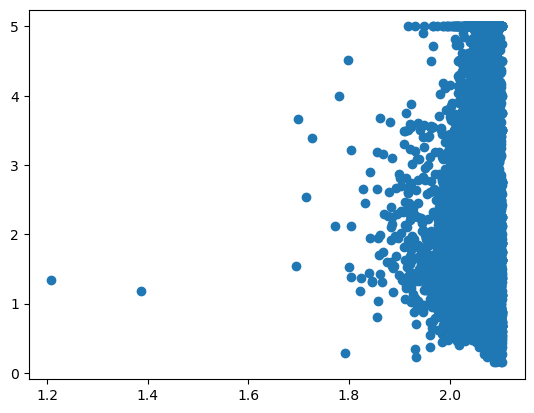

In [8]:
# y: MedHouseVal
# X: Population
import statsmodels.api as sm

# Define vars
# X = cal_df[['Population']]
X = sm.add_constant(cal_df[['Population']]) # make sure to add intercept
y = cal_df[['MedHouseVal']]

# Build Model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

import matplotlib.pyplot as plt

#plt.scatter(cal_df[['Population']], [results.fittedvalues, cal_df[['MedHouseVal']]])
plt.scatter(results.fittedvalues, cal_df[['MedHouseVal']])


*Write your response here.*

There appears to be a very minimal relationship between `MedHouseValue` and `Population`. This is evidenced by the extremely low `R^2` value, which tells us that the % of the variance in `MedHouseValue` explained by `Population` is about `.001`. The coefficient for the Population value is thus extremely small in magnitude and the model tells us that essentially House Value cannot be explained by population alone. However, this small coefficient (`-2.512e-05`) does appear to have a very small std.Error (`7.09e-06`) and be statistically significant at almost any reasonable significance level (`p-value` of the `Population coefficient` is ~`0.000` and the overall `f-statistic` is `0.000398`, both of which are significantly smaller than .05 or .01). This all tells us that, while the relationship is very very minor, we can somewhat confidentally say that there is a small negative relationship between Population and MedianHouseValue, however we can say nothing about whether this relationship is causal in any way.


---

## Part 2: Histograms and Scatterplots


### 2.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $5,000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green
5. Add an appropriate title

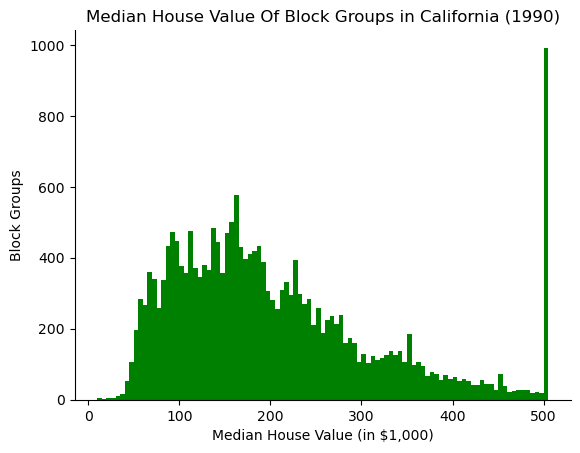

In [16]:
# prepare IPython to work with matplotlib and import the library to something convenient
# %matplotlib inline  
import matplotlib.pyplot as plt

# Create a subplot object
fig, ax = plt.subplots()
X = cal_df[['MedHouseVal']] * 100

# Set Binwidth
bin_width = 5 # 5000/100000 # 5,
bins = np.arange(np.floor(np.min(X) - np.min(X) % bin_width), np.floor(np.max(X) - np.max(X) % bin_width) + bin_width * 2, bin_width)

ax.hist(X, bins = bins, color = 'green')
ax.set_ylabel('Block Groups')
ax.set_xlabel('Median House Value (in $1,000)')
ax.set_title('Median House Value Of Block Groups in California (1990)')

# Remove axes
ax.spines[['right','top']].set_visible(False)


### 2.2: Histogram of average occupancy

Now use your histograming skills to create a fine looking histogram of the average number of household members ("AveOccup"). In the same figure, plot the mean and median values of this variable. (Hint: applying a very common transformation to the data might make things easier).


mean_hh: 	2.85
mean_bg: 	3.07
median_hh: 	N/A
median_bg: 	2.82
max val: 	1243.33


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.37500
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.50000
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
16420,5.7485,26.0,5.366667,0.900000,1542.0,51.400000,37.89,-121.29,1.62500
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.12500


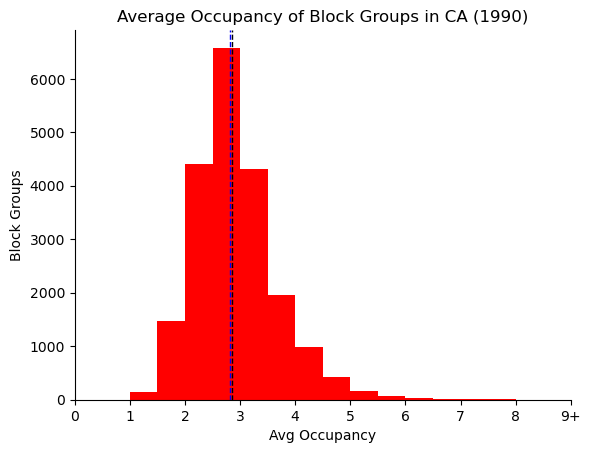

In [10]:
# enter your code here

# Calculate Mean AvgOccup
### Note: I'm going to assume we want to weight this by number of households. This is population/AveOccup
mean_avgOccup_hh = np.average((cal_df['AveOccup']), weights=(cal_df['Population']/cal_df['AveOccup'])) # note the weighted mean

### If we just want the median avg occupancy for a block group, that value is:
mean_avgOccup_bg = np.average(cal_df['AveOccup'])

# Calculate Median AvgOccup
### For Median, if we wanted to weight them, that's a pretty complicated function. So I'm going to assume we just want by bg
median_avgOccup = (cal_df['AveOccup']).median()

print(f"mean_hh: \t{round(mean_avgOccup_hh, 2)}\nmean_bg: \t{round(mean_avgOccup_bg, 2)}\nmedian_hh: \tN/A\nmedian_bg: \t{round(median_avgOccup, 2)}")

# Now lets make the histogram
fig, ax = plt.subplots()
X = cal_df[['AveOccup']]

# Set Binwidth
#bin_width = .1 # 5000/100000 # 5,
#bins = np.arange(np.floor(np.min(X) - np.min(X) % bin_width), np.floor(np.max(X) - np.max(X) % bin_width) + bin_width, bin_width)

print(f"max val: \t{np.max(X):.2f}")
# Note there are a handful of ones with huge AveOccup. Looking at their lat/lng, it seems they are all prisons. This skews the results to make them very hard to see.
cal_df.iloc[np.argmax(cal_df['AveOccup'])] # Max: 1.344
display(cal_df.sort_values('AveOccup', ascending = False).head(10))

# Lets put them all into a bin of their own of 6+ (because this is where this bin will still be the smallest) 
max_val = 8
X = np.where(X > max_val, max_val+1, X)

# Make the Hsitogram
ax.hist(X, bins = np.arange(1,max_val+1, .5), color = 'red')
ax.set_ylabel('Block Groups')
ax.set_xlabel('Avg Occupancy')
ax.set_title('Average Occupancy of Block Groups in CA (1990)')

# Edit last label to be the right size
labels = [item.get_text() for item in ax.xaxis.get_ticklabels()]
labels[-1] = f"{max_val+1}+"
ax.xaxis.set_ticks(np.arange(0, max_val+2))
ax.xaxis.set_ticklabels(labels)

# *Note*: We could alternatively log-scale them, which would make the graph look nice and might make the skew easier to see, \
# but I think that will make things very hard to interpret since the scale would be unintuitive given the units.

# Add Mean/Median Lines
ax.axvline(mean_avgOccup_hh, color='k',linestyle='dashed', linewidth=1)
ax.axvline(median_avgOccup, color='b',linestyle='dashed', linewidth=1)

# Remove axes
ax.spines[['right','top']].set_visible(False)

plt.show()

### 2.3: Scatter plot of housing prices and population

Use matplotlib to create a scatter plot that shows the relationship between the block group median house value (y-axis) and the block group population (x-axis). Properly label your axes, and make sure that your graphic looks polished and professional.

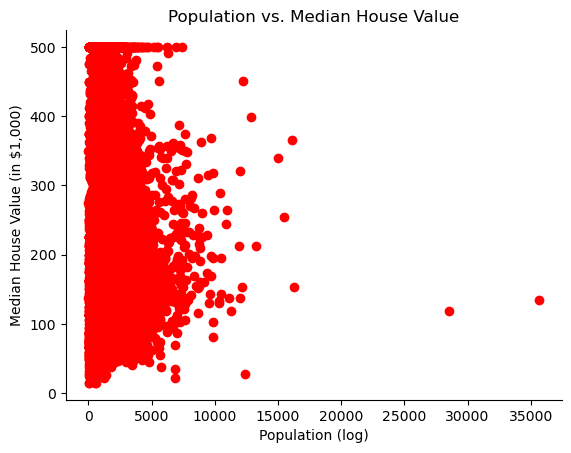

In [11]:
# enter your code here
ax, fig = plt.subplots()

fig.scatter(cal_df['Population'], cal_df['MedHouseVal'] * 100, color = 'r')
fig.set_xlabel('Population (log)')
fig.set_ylabel('Median House Value (in $1,000)')
fig.set_title('Population vs. Median House Value')

# Remove axes
fig.spines[['right','top']].set_visible(False)


### 2.4: Interpret

What do you observe in the above scatter plot? Does there appear to be a relationship between median house value and population in California? Calculate the correlation between these two variables. Do you think this relationship is causal, or just a correlation? Justify your position and compare to your answer in section 1.4.

In [12]:
# enter your code here
# There does not appear to be much of a relationship at all between the two values. As such there is most 
print(f"Correlation: {cal_df['Population'].corr(cal_df['MedHouseVal']):.4f}")

cal_df[cal_df['Population'] > 3000]

Correlation: -0.0246


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
95,2.0096,36.0,2.294016,1.066294,3469.0,1.493328,37.80,-122.26,1.300
185,2.1917,43.0,4.844029,1.091795,4367.0,3.547522,37.79,-122.23,1.128
283,5.9849,22.0,6.528724,1.041179,4985.0,2.534316,37.79,-122.16,3.710
460,1.4012,52.0,3.105714,1.060000,3337.0,9.534286,37.87,-122.26,1.750
485,1.6307,35.0,2.962687,1.001148,3276.0,1.880597,37.86,-122.26,2.536
...,...,...,...,...,...,...,...,...,...
20544,2.0650,23.0,4.803493,1.013646,6330.0,3.455240,38.55,-121.76,2.194
20563,3.1250,9.0,5.148007,1.119593,6837.0,2.899491,38.67,-121.75,1.325
20567,5.3064,15.0,6.423585,0.992453,3060.0,2.886792,38.66,-121.79,1.650
20604,2.3496,17.0,4.551392,0.962527,3265.0,3.495717,39.12,-121.54,0.650


*Write your thoughts here (1-2 paragraphs).*
The correlation is very small here, as described in 1.4 above, and this tells us there is a very weak linear relationship between the two variables. However, as we determined above, this relationship is significant at almost any reasonable significance level and as such, it is not a neglible effect. The relationship tells us that, on the whole, for every individual person in a block group compared to a hypothetically similar, we can expect the `Median House Value` in the block group with one additional person to be slightly lower.

While we can say that this relationship holds across the state, we *cannot*, however, imply that `Population` is the *'cause'* of the drop in `Median House Value`, as correlation does not imply causation. As such, they could both just as reasonably be influenced by unforeseen other factors. We can speculate however, it is the definition census block group that is causing some of the confusion here. Since block groups are generally defined to encompass 600-3000 people, size of block group should not have much effect. However, with a small preference for maintaining continuity decade-over-decade, the block groups with more than 3000 people are most likely either special cases (like the prisons or barrackses - often in low-cost-of-living areas), and, as such, could cause some unexpected results. Furthermore, there is plenty that would go into defining block groups that could correlate with either political power or the rapid growth of an area - both of which could have significant correlations with House values. All to say, there are some arguments to be made for not looking for relationships with Population-size at a geographic level that is defined by population-size.

Note: it can be seen in the above, and other plots, but I remain unclear why the maximum `MedHouseVal` appears to be capped at exactly 500,000. This looks like an articifical boundary that could have an important impact on statistical measures here.

### 2.5 Correlation Matrix

Calculate the correlation of every pair of variables in the dataset. Create a *K* x *K* matrix where the value in the (*i*,*j*) cell is the correlation between the *i*th and *j*th variable. Show off your skills by coloring the cell so that large positive correlations appear green and large negative correlations appear red (use a gradient to make this pretty). What two variables appear to me most positively and negatively correlated? Explain these results.

<Axes: >

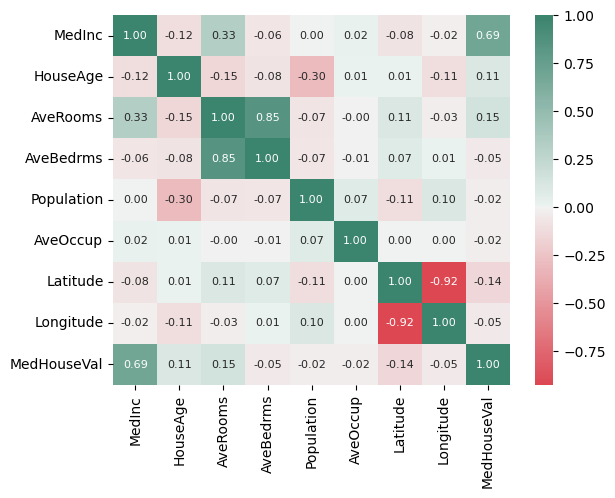

In [13]:
# enter your code here

corr_mtx = cal_df.corr()

cmap = sns.diverging_palette(10, 160, as_cmap=True)
sns.heatmap(
    corr_mtx, 
    cmap=cmap, 
    annot=True, 
    annot_kws={"fontsize":8},
    fmt='.2f',
    center=0)

*Write your response here.*
The two most corellated values appear to be `Average Number of Rooms` and `Average Number of Bedrooms`, with a value of .85. This makes a lot of sense intuitively and is not that interesting in my opinion. However, `Median Income` and `Median Household Value` are also fairly highly corellated (.69) and that represents a bit more of an interesting relationship, which we'll explore below.

As for Negative corellation, `Latitude` and `Longitude` appear to be very strongly negatively corelated, which is interesting but simply a reflection of the diagonal directionality of the shoreline, the Nevada border and ultimately the fault-lines underlying the state's mountain ranges. That it shows up so strongly is fairly interesting but it is just a function of the map, not of the housing market itself. Beyond that, there is a noticable negative correlation between `Population` of a block-group and `HouseAge`. As mentioned above, the defininition of a block group (as it is theoretically defined by size), should not generally correlate with much on its own. However, when it does, it is most likely a relic of some of the process that went into its definition. As noted above, a reason why a block group might be larger than the "ideal size" of `1500`, is because it grew significantly in recent years. e.g. If it was defined in 1980 as a 1500-person block group, but then grew significantly but not above the `3000`-person threshold (which itself is apparently not strict), it would maintain its territorial integrity but have lots of new housing - thus reducing the `HouseAge`. This, as noted above could have all sorts of impact on housing prices that may or may not be expected in the investigation.

As for no correllations. It is somewhat interesting the `Averge Number of Bedrooms` as essentially 0 correlation with `Median House Value`, since more bedrooms would normally imply a larger house, however that makes sense at the block group level since location is a much stronger determinant of value than size is. 

### 2.6 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

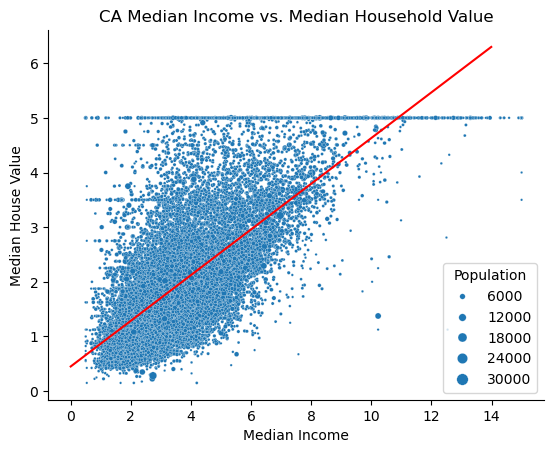

In [14]:
# enter your code here 

# Let's here explore the relationship between Median Income and Median Housing Value - and in particular, see where it might differ
ax, fig = plt.subplots()

fig = sns.scatterplot(
    x = 'MedInc', 
    y = 'MedHouseVal', 
    size = 'Population',
    data = cal_df,
    sizes = (3,80)
)

# Labels
fig.set_xlabel('Median Income')
fig.set_ylabel('Median House Value')
fig.set_title('CA Median Income vs. Median Household Value')

# Fix Axes
fig.spines[['right','top']].set_visible(False)

# Create a trendline
model = sm.OLS(cal_df['MedHouseVal'], sm.add_constant(cal_df['MedInc']))

results = model.fit()
x = np.arange(0, 14, .01)
trendline = results.params['MedInc'] * x + results.params['const']
fig.plot(x, trendline, color = 'r', label = 'trendline')

plt.show()